In [1]:
import pandas as pd
from scipy.stats import linregress
from matplotlib import pyplot as plt
import numpy as np
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')

movie_data = "data/movie_dataset.csv"
read_data = pd.read_csv(movie_data)
read_data

,budget,genres,id,original_language,popularity,release_date,revenue,runtime,title,vote_average,vote_count,director
0,237000000.0,Action Adventure Fantasy Science-Fiction,19995,en,150.437577,10-12-2009,2.787965e+09,162.0,Avatar,7.2,11800,James Cameron
1,300000000.0,Adventure Fantasy Action,285,en,139.082615,19-05-2007,9.610000e+08,169.0,Pirates of the Caribbean: At World's End,6.9,4500,Gore Verbinski
2,245000000.0,Action Adventure Crime,206647,en,107.376788,26-10-2015,8.806746e+08,148.0,Spectre,6.3,4466,Sam Mendes
3,250000000.0,Action Crime Drama Thriller,49026,en,112.312950,16-07-2012,1.084939e+09,165.0,The Dark Knight Rises,7.6,9106,Christopher Nolan
4,260000000.0,Action Adventure Science-Fiction,49529,en,43.926995,07-03-2012,2.841391e+08,132.0,John Carter,6.1,2124,Andrew Stanton
...,...,...,...,...,...,...,...,...,...,...,...,...
4036,220000.0,Action Crime Thriller,9367,es,14.269792,04-09-1992,2.040920e+06,81.0,El Mariachi,6.6,238,Robert Rodriguez
4037,9000.0,Comedy Romance,72766,en,0.642552,26-12-2011,0.000000e+00,85.0,Newlyweds,5.9,5,Edward Burns
4038,0.0,Comedy Drama Romance TV-Movie,231617,en,1.444476,13-10-2013,0.000000e+00,120.0,"Signed, Sealed, Delivered",7.0,6,Scott Smith
4039,0.0,NaN,126186,en,0.857008,03-05-2012,0.000000e+00,98.0,Shanghai Calling,5.7,7,Daniel Hsia


In [2]:
read_data_year = read_data.dropna(subset=['release_date'])
genres_list = []
seen_genres = set()
num = 0
for index, row in read_data.iterrows():
    try:
        read_data_year.loc[index,"Year"]=row['release_date'].split("-")[2]
    except:
        pass
    try:
        splited_word = row["genres"].split()
        for i in splited_word:
            if i not in seen_genres:
                genres_list.append(i)
                seen_genres.add(i)        
    except:
        num = num + 1               
read_data_year["Year"] = read_data_year["Year"].astype(int)

In [3]:
count_dict = {}
def count(gen, cnt):
    sum_vot_avg = 0
    sum_budget = 0
    for index, row in read_data.iterrows():
        try:
            splited_word = row["genres"].split()
            for i in splited_word:
                if gen == i:
                    cnt = cnt + 1 
                    sum_vot_avg = sum_vot_avg + row['vote_average'] 
                    sum_budget = sum_budget + row["budget"]      
        except:
            pass
    return round(cnt,2),round((sum_vot_avg/cnt),2), sum_budget

for genre in genres_list:
    count_dict[genre] =count(genre, 0)
count_dict_df = pd.DataFrame(count_dict).transpose()
count_dict_df.columns = ["number of movies","Ratings","Budget"]
count_dict_df.index.name="Genres"
count_dict_df.to_excel("analysis/table_with_movies_ratings_budget.xlsx")


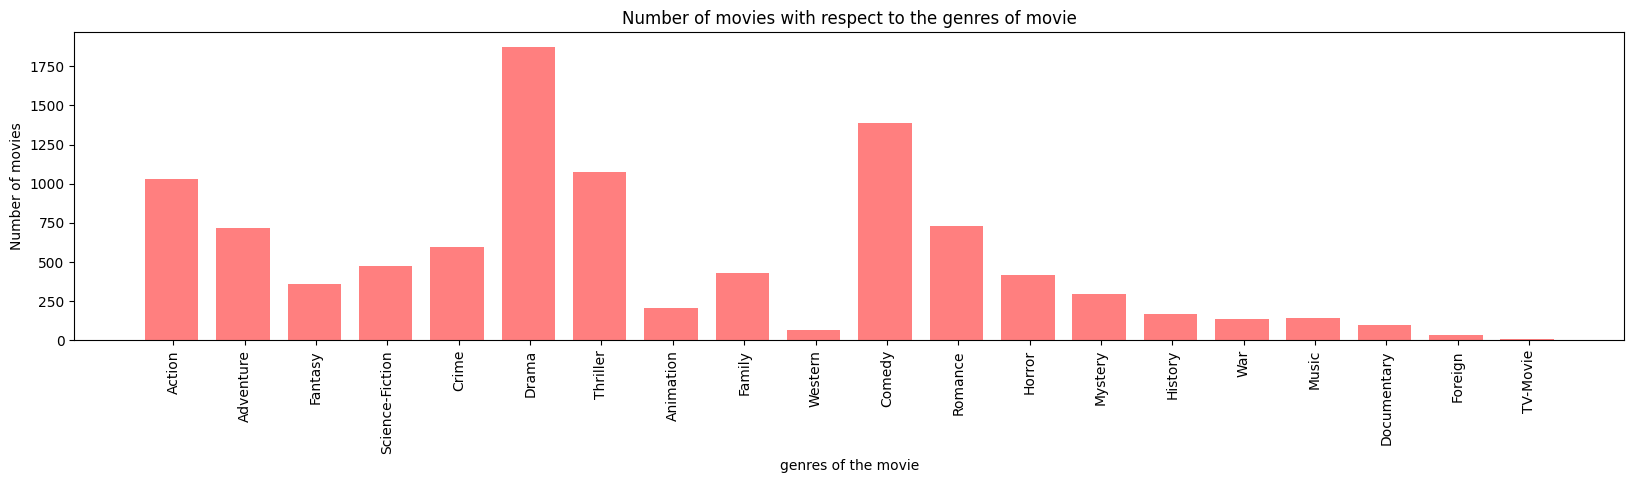

In [4]:
x_axis = np.arange(len(genres_list))
tick_locations = [value+0.4 for value in x_axis]
plt.figure(figsize=(20,4))
plt.bar(x_axis, count_dict_df["number of movies"], color='r', alpha=0.5, align="edge",width=.75)
plt.xticks(tick_locations, genres_list, rotation="vertical")
plt.xlabel("genres of the movie")
plt.ylabel("Number of movies")
plt.title("Number of movies with respect to the genres of movie")
plt.show()


In [5]:
def lin_reg_plot(x,y,x_lab,y_lab):
    corelation = st.pearsonr(x,y)
    x_values = np.array(x)
    y_values = np.array(y)
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq, (0.05, 0.95), xycoords='axes fraction', fontsize=15, color="red")
    plt.xlabel(x_lab)
    plt.ylabel(y_lab)
    plt.title(f"{x_lab} vs {y_lab} and the corelaton value is {round(corelation[0],2)}")
    plt.show()
    

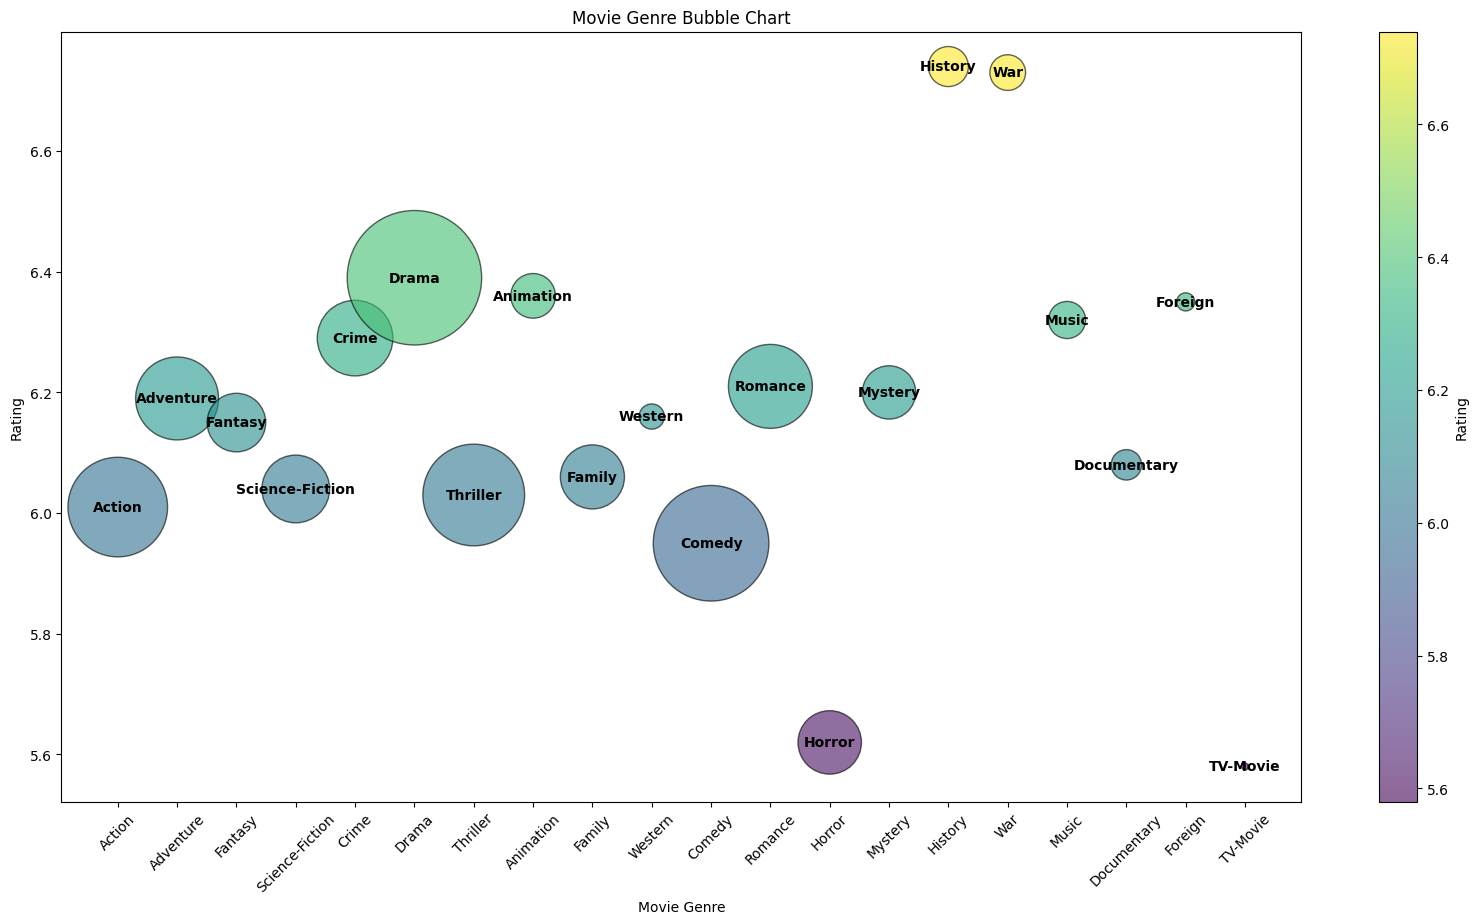

In [6]:
x_pos = range(len(count_dict_df))
plt.figure(figsize=(20, 10))
scatter = plt.scatter(x_pos, count_dict_df['Ratings'], s=count_dict_df['number of movies']*5, 
                      alpha=0.6, c=count_dict_df['Ratings'], cmap='viridis',edgecolors="black")

# Add the genre names in the middle of the bubbles
for i, genre in enumerate(count_dict_df.index):
    plt.text(x_pos[i], count_dict_df['Ratings'][i], genre, ha='center', va='center', color='black', fontweight='bold')

# Adding titles and labels
plt.title('Movie Genre Bubble Chart')
plt.xlabel('Movie Genre')
plt.ylabel('Rating')

# Set the x-ticks to correspond to the genre names
plt.xticks(x_pos, count_dict_df.index, rotation=45)

# Optional: add color bar for the ratings
plt.colorbar(label='Rating')

# Show the plot
plt.show()



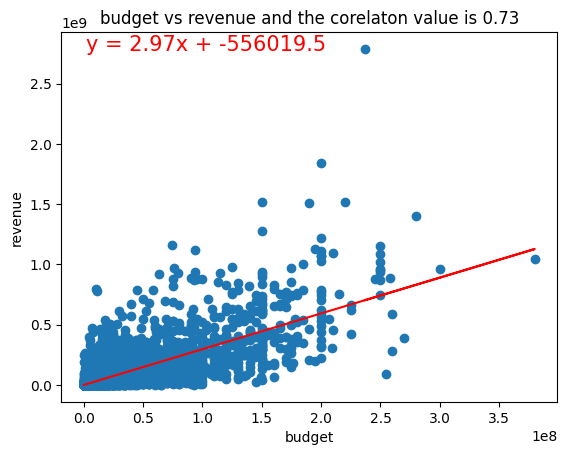

In [7]:
lin_reg_plot(read_data['budget'],read_data['revenue'], 'budget','revenue')

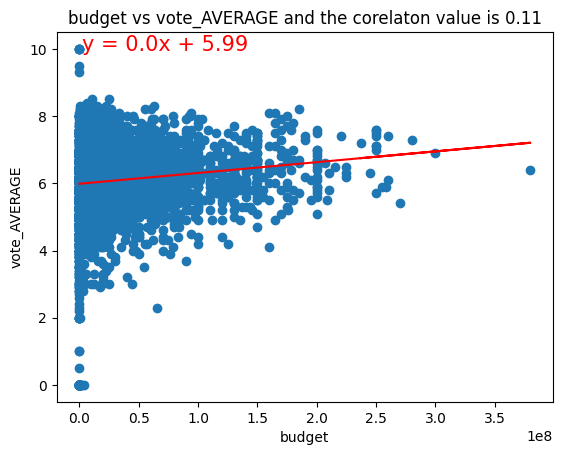

In [8]:
lin_reg_plot(read_data['budget'],read_data['vote_average'], 'budget','vote_AVERAGE')

## Noah


In [9]:
#Find top langauges 
top_languages = read_data['original_language'].value_counts().head(5)

# Display the result
print(top_languages)

original_language
en    3821
fr      45
es      27
zh      20
de      20
Name: count, dtype: int64


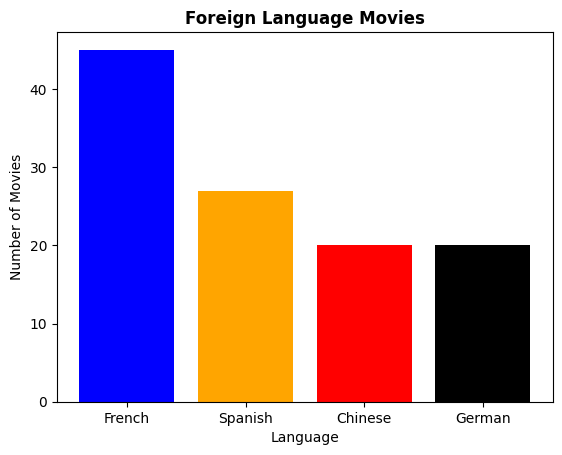

In [10]:
# Top 4 languages
top_languages = read_data['original_language'].value_counts().head(4)

# Labels for the sections of our bar chart
labels = ["French", "Spanish", "Chinese", "German"]

# The values of each section (based on the value_counts)
sizes = [45, 27, 20, 20]

# The colors of each bar
colors = ["blue", "orange", "red", "black"]

# Create the bar chart
plt.bar(labels, sizes, color=colors)


# Add title and labels
plt.title('Foreign Language Movies', fontweight='bold')
plt.ylabel('Number of Movies')
plt.xlabel('Language')
# Display the bar chart
plt.show()

In [11]:
#Find Average rating by language 
average_ratings_by_language = read_data.groupby('original_language')['vote_average'].mean()

# Print the average ratings for the top languages
top_languages_list = ["fr", "es", "zh", "de"]  #French, Spanish, Chinese, German
average_ratings_for_top_languages = average_ratings_by_language[top_languages_list]

print(average_ratings_for_top_languages)

original_language
fr    6.324444
es    6.622222
zh    6.150000
de    6.390000
Name: vote_average, dtype: float64


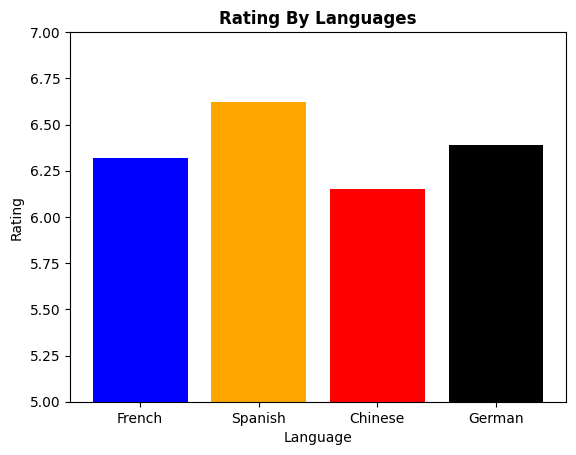

In [12]:
#Find Average rating by language 
average_ratings_by_language = read_data.groupby('original_language')['vote_average'].mean()

# Print the average ratings for the top languages
top_languages_list = ["fr", "es", "zh", "de"]
average_ratings_for_top_languages = average_ratings_by_language[top_languages_list]
#Labels for the sections of our bar chart
labels = ["French", "Spanish", "Chinese", "German"]

# The values of each section (based on the value_counts)
sizes = [6.32,6.62,6.15,6.39]

# Create the pie chart
plt.bar(labels, sizes, color=colors)


# Add title and labels
plt.title('Rating By Languages', fontweight='bold')
plt.xlabel('Language')
plt.ylabel('Rating')
plt.ylim(5,7)
# Display the pie chart
plt.show()


In [18]:
top_languages_list = ["en", "fr", "es", "zh", "de"]

#Find top rated movies (min 1,000 vote count)
filtered_data = read_data[
    (read_data['original_language'].isin(top_languages_list)) & 
    (read_data['vote_count'] >= 1000)]

# Top-rated movie for each language based on vote_average
top_rated_movies = filtered_data.loc[filtered_data.groupby('original_language')['vote_average'].idxmax()]

#Only first genre 
top_rated_movies['genres'] = top_rated_movies['genres'].str.split().str[0]

# Print the title, director, and vote_average columns
print(top_rated_movies[['title', 'director', 'vote_average','genres']])

                         title             director  vote_average   genres
2375                  Downfall  Oliver Hirschbiegel           7.7    Drama
1706  The Shawshank Redemption       Frank Darabont           8.5    Drama
2176           Pan's Labyrinth   Guillermo del Toro           7.6  Fantasy
1178                    Amélie   Jean-Pierre Jeunet           7.8   Comedy


In [20]:
#Full Language Names
language_names = {
    'en': 'English',
    'fr': 'French',
    'es': 'Spanish',
    'zh': 'Chinese',
    'de': 'German'
}

top_rated_movies['original_language'] = top_rated_movies['original_language'].replace(language_names)

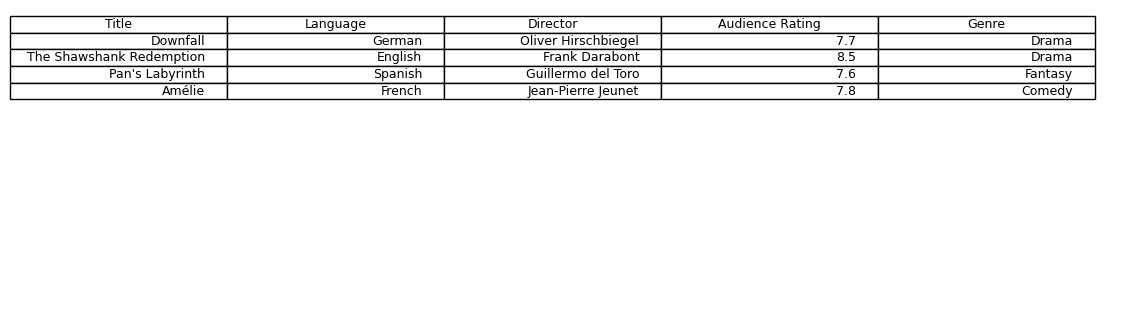

In [26]:
#Data Extraction
data = top_rated_movies[['title','original_language','director', 'vote_average','genres']]

# Create a figure
fig, ax = plt.subplots(figsize=(14, 4))
ax.axis('off')  # Turn off axis
#Table
table = plt.table(cellText=data.values, 
                  colLabels=['Title', 'Language', 'Director', 'Audience Rating','Genre'],
                  loc='best')  
table.set_fontsize(10)
plt.show()
table_df = pd.DataFrame(top_rated_movies)

## Deysi

In [27]:
df = read_data.copy()
df["year"] = ""

# Create a DataFrame
df = pd.DataFrame(read_data)

# Initialize a dictionary to track # of years
year_count = {}

# Loop through all rows
for date in df["release_date"]:
    try:
        # Pull year from the date string
        year = int(date.split('-')[2])

        # Tally the counts
        if year in year_count:
            year_count[year] += 1
        else:
            year_count[year] = 1
    except Exception as e:
        print(f"Skipping invalid date: {date}")

print("Movies released by year:")
print(year_count)


Skipping invalid date: nan
Movies released by year:
{2009: 197, 2007: 159, 2015: 192, 2012: 172, 2010: 191, 2016: 92, 2006: 205, 2008: 176, 2013: 200, 2011: 196, 2014: 196, 2005: 189, 1997: 97, 2004: 168, 1999: 139, 1995: 61, 2003: 136, 2001: 147, 2002: 162, 1998: 112, 2000: 142, 1990: 27, 1991: 26, 1994: 46, 1996: 79, 1982: 20, 1993: 39, 1992: 28, 1989: 25, 1984: 26, 1988: 28, 1978: 12, 1962: 7, 1980: 18, 1981: 28, 1968: 10, 1985: 21, 1940: 5, 1963: 8, 1987: 25, 1973: 9, 1983: 22, 1979: 13, 1976: 8, 1986: 20, 1977: 13, 1970: 11, 1971: 10, 1969: 10, 1960: 3, 1965: 6, 1964: 10, 1927: 1, 1974: 7, 1975: 6, 1967: 4, 1951: 3, 1972: 6, 1961: 5, 1946: 3, 1953: 4, 1954: 4, 1959: 3, 1932: 1, 1947: 2, 1956: 3, 1945: 4, 1952: 4, 1930: 1, 1966: 4, 1939: 3, 1950: 1, 1948: 3, 1958: 1, 1957: 2, 1944: 2, 1938: 2, 1949: 2, 1936: 2, 2017: 1, 1937: 1, 1941: 1, 1955: 2, 1942: 2, 1929: 2, 1935: 1, 1933: 2, 1916: 1, 1934: 1, 1925: 1}


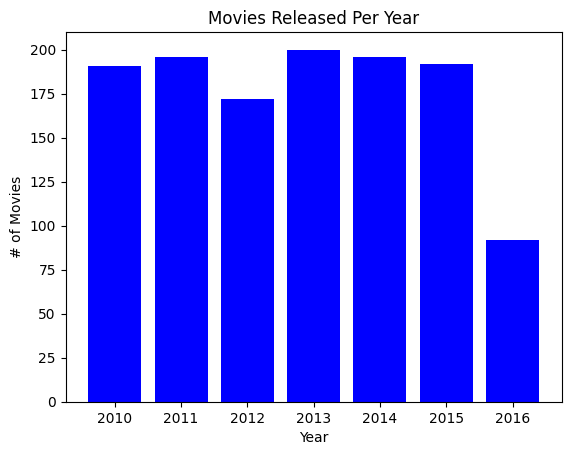

In [28]:
#Create an array, data only goes up to 2017 (2017 only had 1 movie)
years = [2010, 2011, 2012, 2013, 2014, 2015, 2016]
movie_count = [191, 196, 172, 200, 196, 192, 92]

# Create an x-axis array
x_axis = np.arange(len(years))

# Plot the bar chart
plt.bar(x_axis, movie_count, color="b", align="center")

# Set title, label, and ticks
plt.xticks(x_axis, years)
plt.xlabel("Year")
plt.ylabel("# of Movies")
plt.title("Movies Released Per Year")

# Display the plot
plt.show()
#plt.savefig("bar1.png")

<function matplotlib.pyplot.plot(*args: 'float | ArrayLike | str', scalex: 'bool' = True, scaley: 'bool' = True, data=None, **kwargs) -> 'list[Line2D]'>

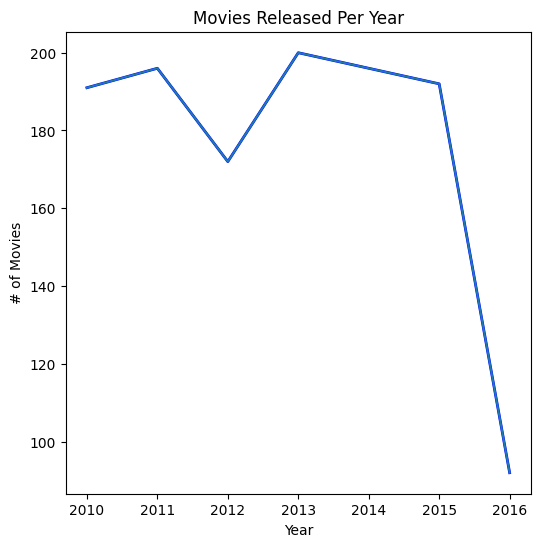

In [30]:
years = [2010, 2011, 2012, 2013, 2014, 2015, 2016]
movie_count = [191, 196, 172, 200, 196, 192, 92]

#Set title, labels, and ticks
fig, ax1 = plt.subplots (figsize = (6,6))
plt.plot(x_axis, movie_count, linewidth = 2, color = "blue", label = "# of Movies")
plt.xlabel("Year")
plt.ylabel("# of Movies")
plt.xticks(x_axis, years)
plt.title("Movies Released Per Year")

# Display line graph
plt.plot(x_axis, movie_count)
plt.savefig("analysis/lineplot.png")
plt.plot

# Jayla

In [31]:

#Top 5 directors with the highest revenue.
directors_revenue = read_data.groupby("director")["revenue"].sum()
top_5_directors = directors_revenue.sort_values(ascending=False).head(5)


print(top_5_directors.index.tolist())


['Steven Spielberg', 'Peter Jackson', 'James Cameron', 'Michael Bay', 'Christopher Nolan']


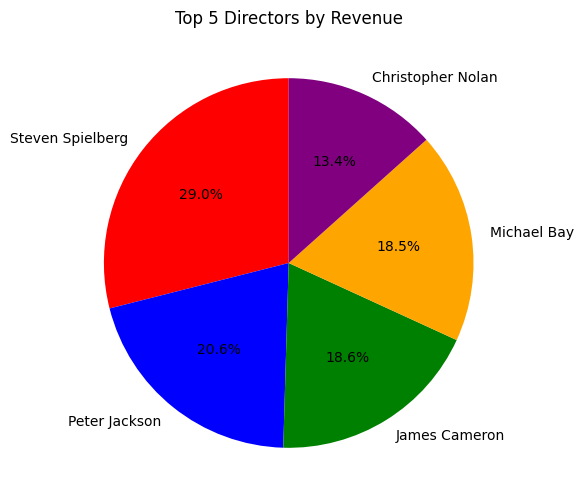

In [32]:
#Create a pie chart the Top 5 directors with the highest revenue
x_axis = np.arange(len(top_5_directors))
tick_locations = [value+0.4 for value in x_axis]


plt.figure(figsize=(12, 6))  
plt.pie(top_5_directors.values, labels=top_5_directors.index, autopct='%1.1f%%', startangle=90, colors=['red', 'blue', 'green', 'orange', 'purple'])
plt.title('Top 5 Directors by Revenue')
plt.show()


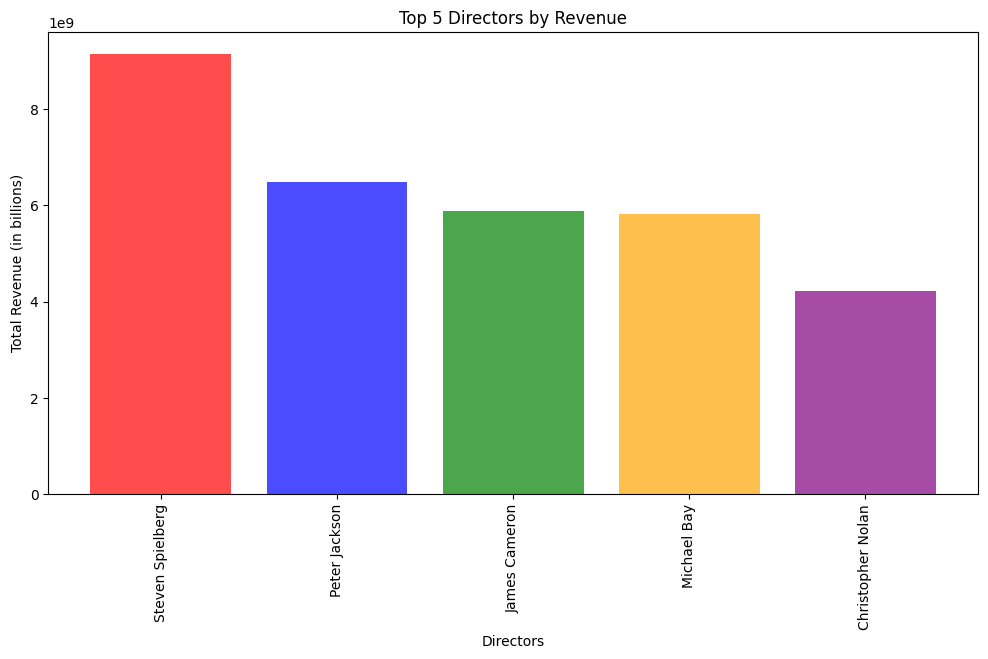

In [33]:
x_axis = np.arange(len(top_5_directors)) 
tick_locations = [value + 0.4 for value in x_axis] 

plt.figure(figsize=(12,6))  
plt.bar(x_axis, top_5_directors.values, color=['red', 'blue', 'green', 'orange', 'purple'], alpha=0.7, align="edge")  
plt.xticks(tick_locations, top_5_directors.index, rotation="vertical") 
plt.title('Top 5 Directors by Revenue')
plt.xlabel('Directors')
plt.ylabel('Total Revenue (in billions)')
plt.show()